In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = False

import warnings
warnings.filterwarnings("ignore")

from prop_models import coro, agpm, misc
reload(coro)

wavelength_c = 750e-9*u.m

In [2]:
c = coro.CORO(dm_inf='inf.fits')

INFO:poppy:Loaded influence function from inf.fits for DM
DEBUG:poppy:Initialized: OAP1, fl =2.00e-01 m
DEBUG:poppy:Initialized: OAP2, fl =2.00e-01 m
DEBUG:poppy:Initialized: OAP3, fl =5.00e-01 m
DEBUG:poppy:Initialized: OAP4, fl =3.50e-01 m
DEBUG:poppy:Initialized: OAP5, fl =2.00e-01 m
INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added optic: Circle, radius=5.1 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: DM after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP1 after separation: 2.00e+02 mm 
INFO:poppy:Added optic: Circle, radius=6.35 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: Int Focal Plane after separation: 2.00e+02 mm 
INFO:poppy:Added optic: OAP2 after separation: 2.00e+02 mm 
INFO:poppy:Added optic: Circle, radius=6.35 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: Apodizer Place-holder after separation: 2.00e+02 mm 
INFO:poppy:Added optic: OAP3 after separation: 5.00e+02 mm 
INFO:poppy:Added optic: Circle, radius=6.35 

0.0002178080140498601


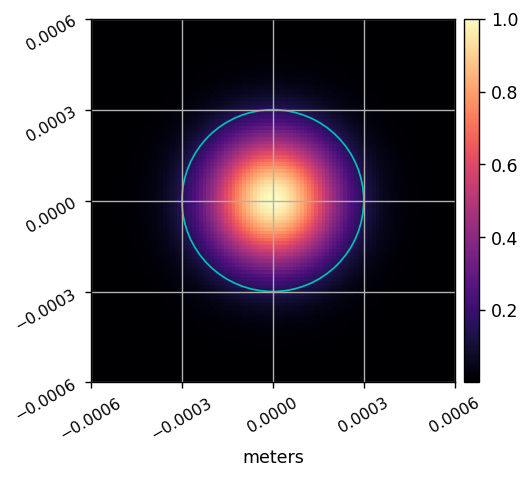

25.25 pix


In [3]:
ext = c.act_spacing*4
ng = 101
pxscl = ext/(ng*u.pix)
xs = (np.linspace(-ng/2,ng/2-1,ng)+1/2)*pxscl.value
x,y = np.meshgrid(xs,xs)
r = np.sqrt(x**2 + y**2)

d = c.act_spacing.value/1.25
d = c.act_spacing.value/np.sqrt(-np.log(0.15))
print(d)
inf = np.exp(-(r/d)**2)
r15 = d*np.sqrt(-np.log(0.15)) 
fig,ax = misc.myimshow(inf, pxscl=pxscl, patches=[Circle((0,0), r15, fill=False, color='c')], 
                       display_fig=False, return_fig=True)
ticks = np.linspace(-ext.value/2, ext.value/2, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid()
display(fig)

sampling = c.act_spacing/pxscl
print(sampling)

hdr = fits.Header()
hdr["SAMPLING"] = sampling.value
inf_hdu = fits.PrimaryHDU(data=inf, header=hdr)
inf_hdu.writeto('inf.fits', overwrite=True)